# COM6018 - Assignment 1

Student Username: ` ACS23AB `

## Analysing Carbon Emissions Data

Before attempting the assignment make sure that you have read the accompanying assignment notes document carefully. This explains important details about what is expected and how you will be assessed.

## Loading the data

The data is being read from the file `owid-co2-data.csv` which you must download and store in the same directory as this notebook. Please leave the cell below unchanged. 

In [18]:
import pandas as pd

df = pd.read_csv('owid-co2-data.csv')

Add any further imports that your notebook needs in the cell below. If you are not using any then simply leave the cell blank. Remember, you are only allowed to use modules from the standard Python library, plus pandas, numpy, matplotlib and seaborn.

In [26]:
# SOLUTION

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. The growth of CO<sub>2</sub> emissions

*How have CO<sub>2</sub> emissions grown over time?*

he dataset contains entries for countries grouped into four income groups: low, lower-middle, upper-middle and high. i) How have the total annual CO<sub>2</sub> emissions of each income group varied over the years 1950 to 2021? ii) How has the per capita CO<sub>2</sub> emissions (i.e., the emissions per person) of these groups varied over the same period. Comment on how the contribution of each income group is different when measured in terms of total emissions and per capita emissions.

(Add your solution below. Add further markdown and code cells as needed.)

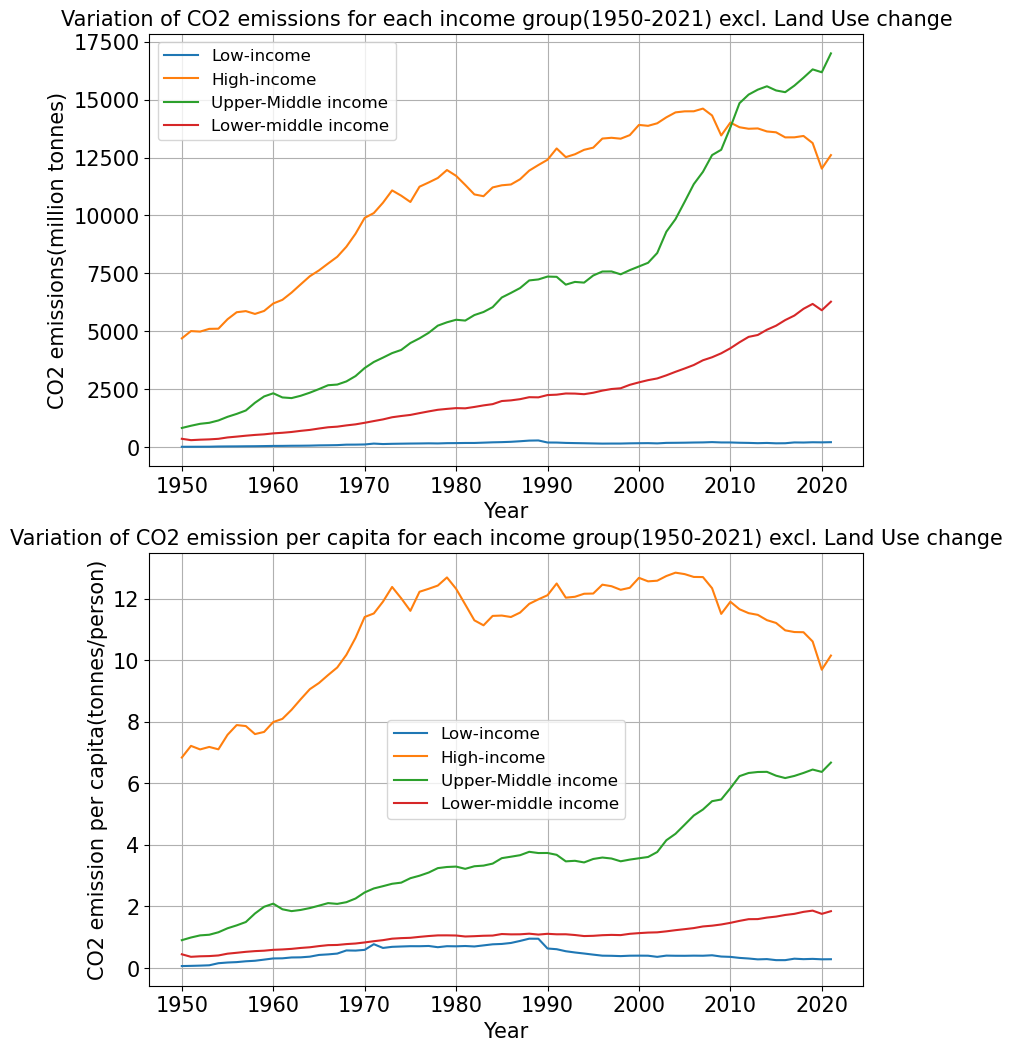

In [110]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.
#CO2 emissions
low_df = df[(df['country'] == 'Low-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]
high_df = df[(df['country'] == 'High-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]
um_df = df[(df['country'] == 'Upper-middle-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]
lm_df = df[(df['country'] == 'Lower-middle-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]

plt.figure(figsize=[3.4,3.4])
plt.subplot(2,1,1)
plt.plot(low_df['year'],low_df['co2'])
plt.plot(high_df['year'],high_df['co2'])
plt.plot(um_df['year'],um_df['co2'])
plt.plot(lm_df['year'],lm_df['co2'])
income_group = ['Low-income','High-income','Upper-Middle income','Lower-middle income']
plt.legend(income_group,fontsize=12)
plt.xlabel('Year',fontsize=15)
plt.ylabel('CO2 emissions(million tonnes)',fontsize=15)
plt.title('Variation of CO2 emissions for each income group(1950-2021) excl. Land Use change',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

#CO2 emissions per capita
plt.subplot(2,1,2)
plt.plot(low_df['year'],low_df['co2_per_capita'])
plt.plot(high_df['year'],high_df['co2_per_capita'])
plt.plot(um_df['year'],um_df['co2_per_capita'])
plt.plot(lm_df['year'],lm_df['co2_per_capita'])
income_group = ['Low-income','High-income','Upper-Middle income','Lower-middle income']
plt.legend(income_group,fontsize=12)
plt.xlabel('Year',fontsize=15)
plt.ylabel('CO2 emission per capita(tonnes/person)',fontsize=15)
plt.title('Variation of CO2 emission per capita for each income group(1950-2021) excl. Land Use change',fontsize=15)
plt.grid()
plt.subplots_adjust(left=1, bottom=0.2, right=3.1, top=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


## Analysis for the CO<sub>2</sub> emissions for each income group :

<p>From the above plot we can make the following observations regarding the CO<sub>2</sub>&nbsp;emissions:</p>
<ul>
<li>Evidently, the high-income countries were the biggest emitters of CO<sub>2</sub>&nbsp;until 2010, at which upper-middle-income countries overtook them and took the top spot for CO<sub>2</sub>&nbsp;emissions.</li>
<li>Comparatively speaking, the low-income country groups emit very little CO2, whereas the lower-middle income country groups emit CO<sub>2</sub>&nbsp;at a steadily growing rate, making them the third largest contributors to CO<sub>2</sub>&nbsp;emissions.</li>
<li>Since 2010, the upper-middle income country groups have emitted the most CO<sub>2</sub>&nbsp;and their emissions have been steadily rising.</li>
<li>The plot also suggests that starting in 2010, high-income groups' CO<sub>2</sub>&nbsp;emissions fell.</li>
</ul>

<h2>Analysis for CO2 emissions per capita for each income group:</h2>
<p>A number of inferences on CO<sub>2</sub>&nbsp;emissions per capita in each income group could be made from the second plot:</p>
<ul>
<li>In terms of CO<sub>2</sub>&nbsp;emissions per capita from 1950 to 2020, the high-income group countries consistently contributed the most, with a significant variation from the other groups.</li>
<li>The emission per capita for nations in the upper-middle income group has been rising rapidly, and in 2020, the gap with high-income countries has narrowed.</li>
<li>The CO<sub>2</sub>&nbsp;emissions per capita of lower-middle income countries are steadily rising, but those of low income countries modestly scaled until 1990 and eventually dipped until 2020.</li>
<li>High-income countries&nbsp;display oscillatory behavior, as evidenced by fluctuations in their respective data, despite consistently being the highest emitters per capita.</li></ul>
   <p>In terms of CO<sub>2</sub>&nbsp;emissions, high-income countries did better than upper-middle-income countries since 2010; nevertheless, when per capita income is taken into account, it shows itself to be the biggest contributor across the entire period of time.</p>



## Q2. The share of CO2 emissions by country over time.

*Which countries have the highest CO<sub>2</sub> emissions?*

Compare the share of global carbon emissions for the top 5 emitting countries as a proportion of the total world emissions. Make separate plots for the years 1960, 1990 and 2020. Make a similar set of plots but normalised in a way that accounts for the population of each country. Note, all the plots should appear in the same figure.

Comment on how the top 5 emitting countries have changed over time and how the top 5 emitting countries change when you normalise for population.

(Add your solution below. Add further markdown and code cells as needed.)

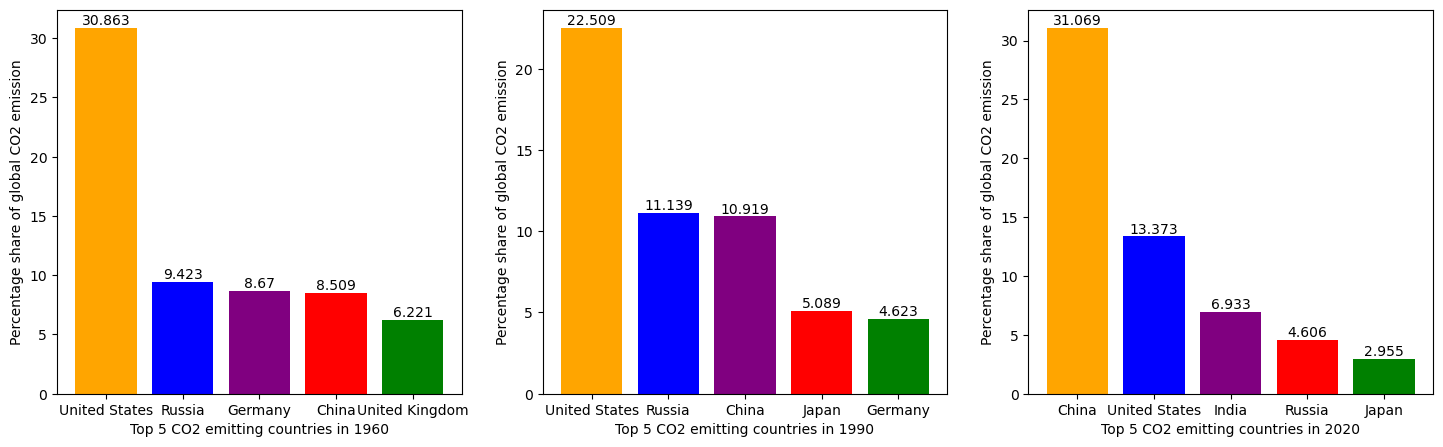

In [111]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.
df_1960 = df[df['year'] == 1960] #1960 dataframe
df_1960 = df_1960.dropna(subset=['iso_code'])
df_1960 = df_1960.sort_values('share_global_co2',ascending=False)
df_1990 = df[df['year'] == 1990] #1990 dataframe
df_1990 = df_1990.dropna(subset=['iso_code'])
df_1990 = df_1990.sort_values('share_global_co2',ascending=False)
df_2020 = df[df['year'] == 2020] #2020 dataframe
df_2020 = df_2020.dropna(subset=['iso_code'])
df_2020 = df_2020.sort_values('share_global_co2',ascending=False)

#1960-plot
color = ['orange', 'blue', 'purple', 'red', 'green']
plt.subplot(1,3,1)
plt.bar(df_1960.iloc[0:5]['country'],df_1960.iloc[0:5]['share_global_co2'],color = color)
for i in range(5):
    plt.text(df_1960.iloc[i]['country'],df_1960.iloc[i]['share_global_co2'],df_1960.iloc[i]['share_global_co2'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 CO2 emitting countries in 1960')
plt.ylabel('Percentage share of global CO2 emission')


#1990-plot
plt.subplot(1,3,2)
plt.bar(df_1990.iloc[0:5]['country'],df_1990.iloc[0:5]['share_global_co2'],color = color)
for i in range(5):
    plt.text(df_1990.iloc[i]['country'],df_1990.iloc[i]['share_global_co2'],df_1990.iloc[i]['share_global_co2'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 CO2 emitting countries in 1990')
plt.ylabel('Percentage share of global CO2 emission')

#2020-plot
plt.subplot(1,3,3)
plt.bar(df_2020.iloc[0:5]['country'],df_2020.iloc[0:5]['share_global_co2'],color = color)
for i in range(5):
    plt.text(df_2020.iloc[i]['country'],df_2020.iloc[i]['share_global_co2'],df_2020.iloc[i]['share_global_co2'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 CO2 emitting countries in 2020')
plt.ylabel('Percentage share of global CO2 emission')
plt.subplots_adjust(left=0.95, bottom=0.2, right=3.1, top=1)
plt.show()





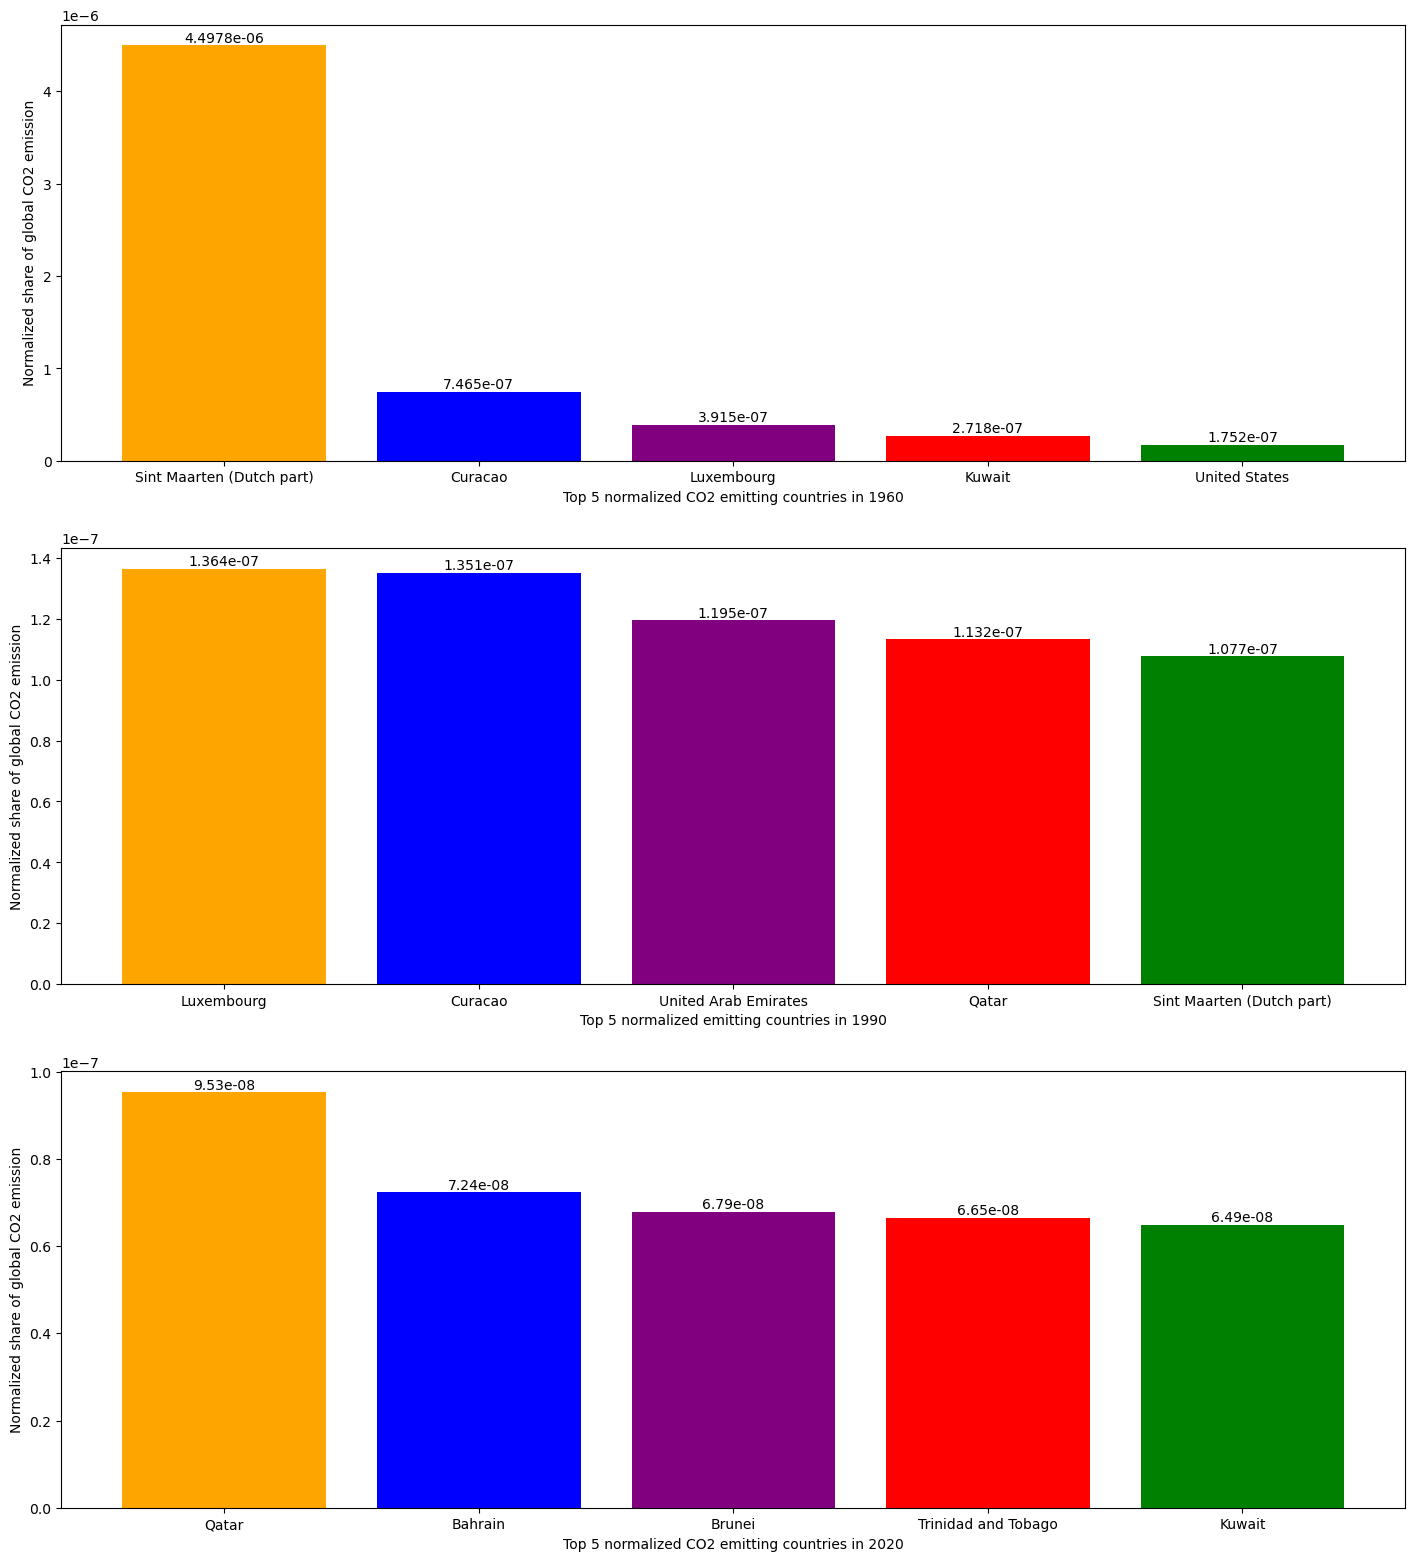

In [22]:
df_1960['share_global_co2_normalized'] = df_1960['share_global_co2']/df_1960['population']
df_1960['share_global_co2_normalized'] = df_1960['share_global_co2_normalized'].round(10)
df_1960 = df_1960.sort_values('share_global_co2_normalized',ascending=False)
df_1990['share_global_co2_normalized'] = df_1990['share_global_co2']/df_1990['population']
df_1990['share_global_co2_normalized'] = df_1990['share_global_co2_normalized'].round(10)
df_1990 = df_1990.sort_values('share_global_co2_normalized',ascending=False)
df_2020['share_global_co2_normalized'] = df_2020['share_global_co2']/df_2020['population']
df_2020['share_global_co2_normalized'] = df_2020['share_global_co2_normalized'].round(10)
df_2020 = df_2020.sort_values('share_global_co2_normalized',ascending=False)

#1960-plot
color = ['orange', 'blue', 'purple', 'red', 'green']
plt.subplot(3,1,1)
plt.bar(df_1960.iloc[0:5]['country'],df_1960.iloc[0:5]['share_global_co2_normalized'],color = color)
for i in range(5):
    plt.text(df_1960.iloc[i]['country'],df_1960.iloc[i]['share_global_co2_normalized'],df_1960.iloc[i]['share_global_co2_normalized'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 normalized CO2 emitting countries in 1960')
plt.ylabel('Normalized share of global CO2 emission')


#1990-plot
plt.subplot(3,1,2)
plt.bar(df_1990.iloc[0:5]['country'],df_1990.iloc[0:5]['share_global_co2_normalized'],color = color)
for i in range(5):
    plt.text(df_1990.iloc[i]['country'],df_1990.iloc[i]['share_global_co2_normalized'],df_1990.iloc[i]['share_global_co2_normalized'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 normalized emitting countries in 1990')
plt.ylabel('Normalized share of global CO2 emission')

#2020-plot
plt.subplot(3,1,3)
plt.bar(df_2020.iloc[0:5]['country'],df_2020.iloc[0:5]['share_global_co2_normalized'],color = color)
for i in range(5):
    plt.text(df_2020.iloc[i]['country'],df_2020.iloc[i]['share_global_co2_normalized'],df_2020.iloc[i]['share_global_co2_normalized'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 normalized CO2 emitting countries in 2020')
plt.ylabel('Normalized share of global CO2 emission')
plt.subplots_adjust(left=1, bottom=0.01, right=3.1, top=3.1)
plt.show()

<h2>Analysis of top 5 CO<sub>2</sub>&nbsp;emitting countries as per global share of the same:</h2>
<p>The top 5 CO<sub>2</sub>&nbsp;emitting countries for the years 1960,1990 and 2020:</p>
<table style="height: 164px; border-color: white; margin-left: auto; margin-right: auto; width: 418px;">
<tbody>
<tr style="height: 21px;">
<td style="width: 132.875px; height: 21px; text-align: center;"><strong>1960</strong></td>
<td style="width: 131.125px; height: 21px; text-align: center;"><strong>1990</strong></td>
<td style="width: 132px; height: 21px; text-align: center;"><strong>2020</strong></td>
</tr>
<tr style="height: 21.0208px;">
<td style="width: 132.875px; height: 21.0208px; text-align: center;">United States</td>
<td style="width: 131.125px; height: 21.0208px; text-align: center;">United States</td>
<td style="width: 132px; height: 21.0208px; text-align: center;">China</td>
</tr>
<tr style="height: 21px;">
<td style="width: 132.875px; height: 21px; text-align: center;">Russia</td>
<td style="width: 131.125px; height: 21px; text-align: center;">Russia</td>
<td style="width: 132px; height: 21px; text-align: center;">United States</td>
</tr>
<tr style="height: 21px;">
<td style="width: 132.875px; height: 21px; text-align: center;">Germany</td>
<td style="width: 131.125px; height: 21px; text-align: center;">China</td>
<td style="width: 132px; height: 21px; text-align: center;">India</td>
</tr>
<tr style="height: 21px;">
<td style="width: 132.875px; height: 21px; text-align: center;">China</td>
<td style="width: 131.125px; height: 21px; text-align: center;">Japan</td>
<td style="width: 132px; height: 21px; text-align: center;">Russia</td>
</tr>
<tr style="height: 21px;">
<td style="width: 132.875px; height: 21px; text-align: center;">United Kingdom</td>
<td style="width: 131.125px; height: 21px; text-align: center;">Germany</td>
<td style="width: 132px; height: 21px; text-align: center;">Japan</td>
</tr>
</tbody>
</table>
<p>From the plots, we can infer:</p>
<ul>
<li>The top 5 CO<sub>2</sub>&nbsp;emitting&nbsp;countries regularly include the United States, China, and Russia, indicating that these countries are the main contributors to CO<sub>2</sub>&nbsp;emissions.</li>
<li>Japan replaced the UK to become one of the major emitters of CO<sub>2</sub>&nbsp;in 1990.</li>
<li>India ranked third among the countries that contributed the most CO<sub>2</sub>&nbsp;emissions in 2020.</li>
</ul>
<h2 id="Analysis-of-top-5-CO2-emitting-countries-as-per-global-share-of-the-same:">Analysis of top 5 normalized CO<sub>2</sub>&nbsp;emitting countries as per global share of the same:</h2>
<p>The top 5 per capita CO<sub>2</sub>&nbsp;emitting countries in the years 1960,1990 and 2020 are:</p>
<table style="height: 164px; border-color: white; margin-left: auto; margin-right: auto; width: 418px;">
<tbody>
<tr style="height: 17.1458px;">
<td style="width: 151.167px; height: 17.1458px; text-align: center;"><strong>1960</strong></td>
<td style="width: 151.167px; height: 17.1458px; text-align: center;"><strong>1990</strong></td>
<td style="width: 151.333px; height: 17.1458px; text-align: center;"><strong>2020</strong></td>
</tr>
<tr style="height: 17px;">
<td style="width: 151.167px; height: 17px; text-align: center;">Sint Maarten(Dutch Part)</td>
<td style="width: 151.167px; height: 17px; text-align: center;">Luxembourg</td>
<td style="width: 151.333px; height: 17px; text-align: center;">Qatar</td>
</tr>
<tr style="height: 17px;">
<td style="width: 151.167px; height: 17px; text-align: center;">Curacao</td>
<td style="width: 151.167px; height: 17px; text-align: center;">Curacao</td>
<td style="width: 151.333px; height: 17px; text-align: center;">Bahrain</td>
</tr>
<tr style="height: 17px;">
<td style="width: 151.167px; height: 17px; text-align: center;">Luxembourg</td>
<td style="width: 151.167px; height: 17px; text-align: center;">United Arab Emirates</td>
<td style="width: 151.333px; height: 17px; text-align: center;">Brunei</td>
</tr>
<tr style="height: 17px;">
<td style="width: 151.167px; height: 17px; text-align: center;">Kuwait</td>
<td style="width: 151.167px; height: 17px; text-align: center;">Qatar</td>
<td style="width: 151.333px; height: 17px; text-align: center;">Trinidad and Tobago</td>
</tr>
<tr style="height: 17px;">
<td style="width: 151.167px; height: 17px; text-align: center;">United States</td>
<td style="width: 151.167px; height: 17px; text-align: center;">Sint Maarten(Dutch Part)</td>
<td style="width: 151.333px; height: 17px; text-align: center;">Kuwait</td>
</tr>
</tbody>
</table>
<p>The following conclusions can be drawn from the plots of the top 5 CO<sub>2</sub>&nbsp;emitting countries after normalizing their data to account for population:</p>
<ul>
<li>The list includes countries with smaller populations, which may indicate that although their CO<sub>2</sub>&nbsp;emissions are lower, their per capita emissions are higher in these countries.</li>
<li>Nonetheless, it is evident from 1960 that the United States is still on the list, indicating that this nation was a significant CO<sub>2</sub>&nbsp;emitter at the time regardless of the factors taken into account.</li>
<li>In 1990, as in 1960, Sint Maarten's emissions had decreased, but Luxembourg, Curacao, and Sint Maarten continued to be major contributors of emissions per capita.</li>
<li>As of 2020, Qatar was the highest emitter per capita, entering into the top 5 in&nbsp;1990. Nations, such as Kuwait, Bahrain, Qatar,&nbsp;are among the top 5 participants in terms of per capita emissions, as can be additionally witnessed in 2020.</li>
</ul>
<p>These points lead to the conclusion that ranking countries based solely on CO<sub>2</sub>&nbsp;emissions is insufficient, as it ignores the contribution of countries with lower populations. Per capita CO<sub>2</sub>&nbsp;emission is an important metric because it highlights how each person is accountable for each country's contribution to CO<sub>2</sub>&nbsp;emissions and, consequently, climate change.</p>

## Q3. The link between GDP and CO<sub>2</sub> emissions

*Do countries with high GDP always have high per capita CO<sub>2</sub> emissions.* 

Plot the per capita CO<sub>2</sub> emissions against the GDP per capita for each country. Design your plot so that the size of the marker is proportional to the population of the country. Only consider countries with a population of at leat 5 million people. 

Compare these plots for the year 1978, 1998 and 2018.  Comment on the relationship between the two variables and how it has changed over time.

(Add your solution below. Add further markdown and code cells as needed.)

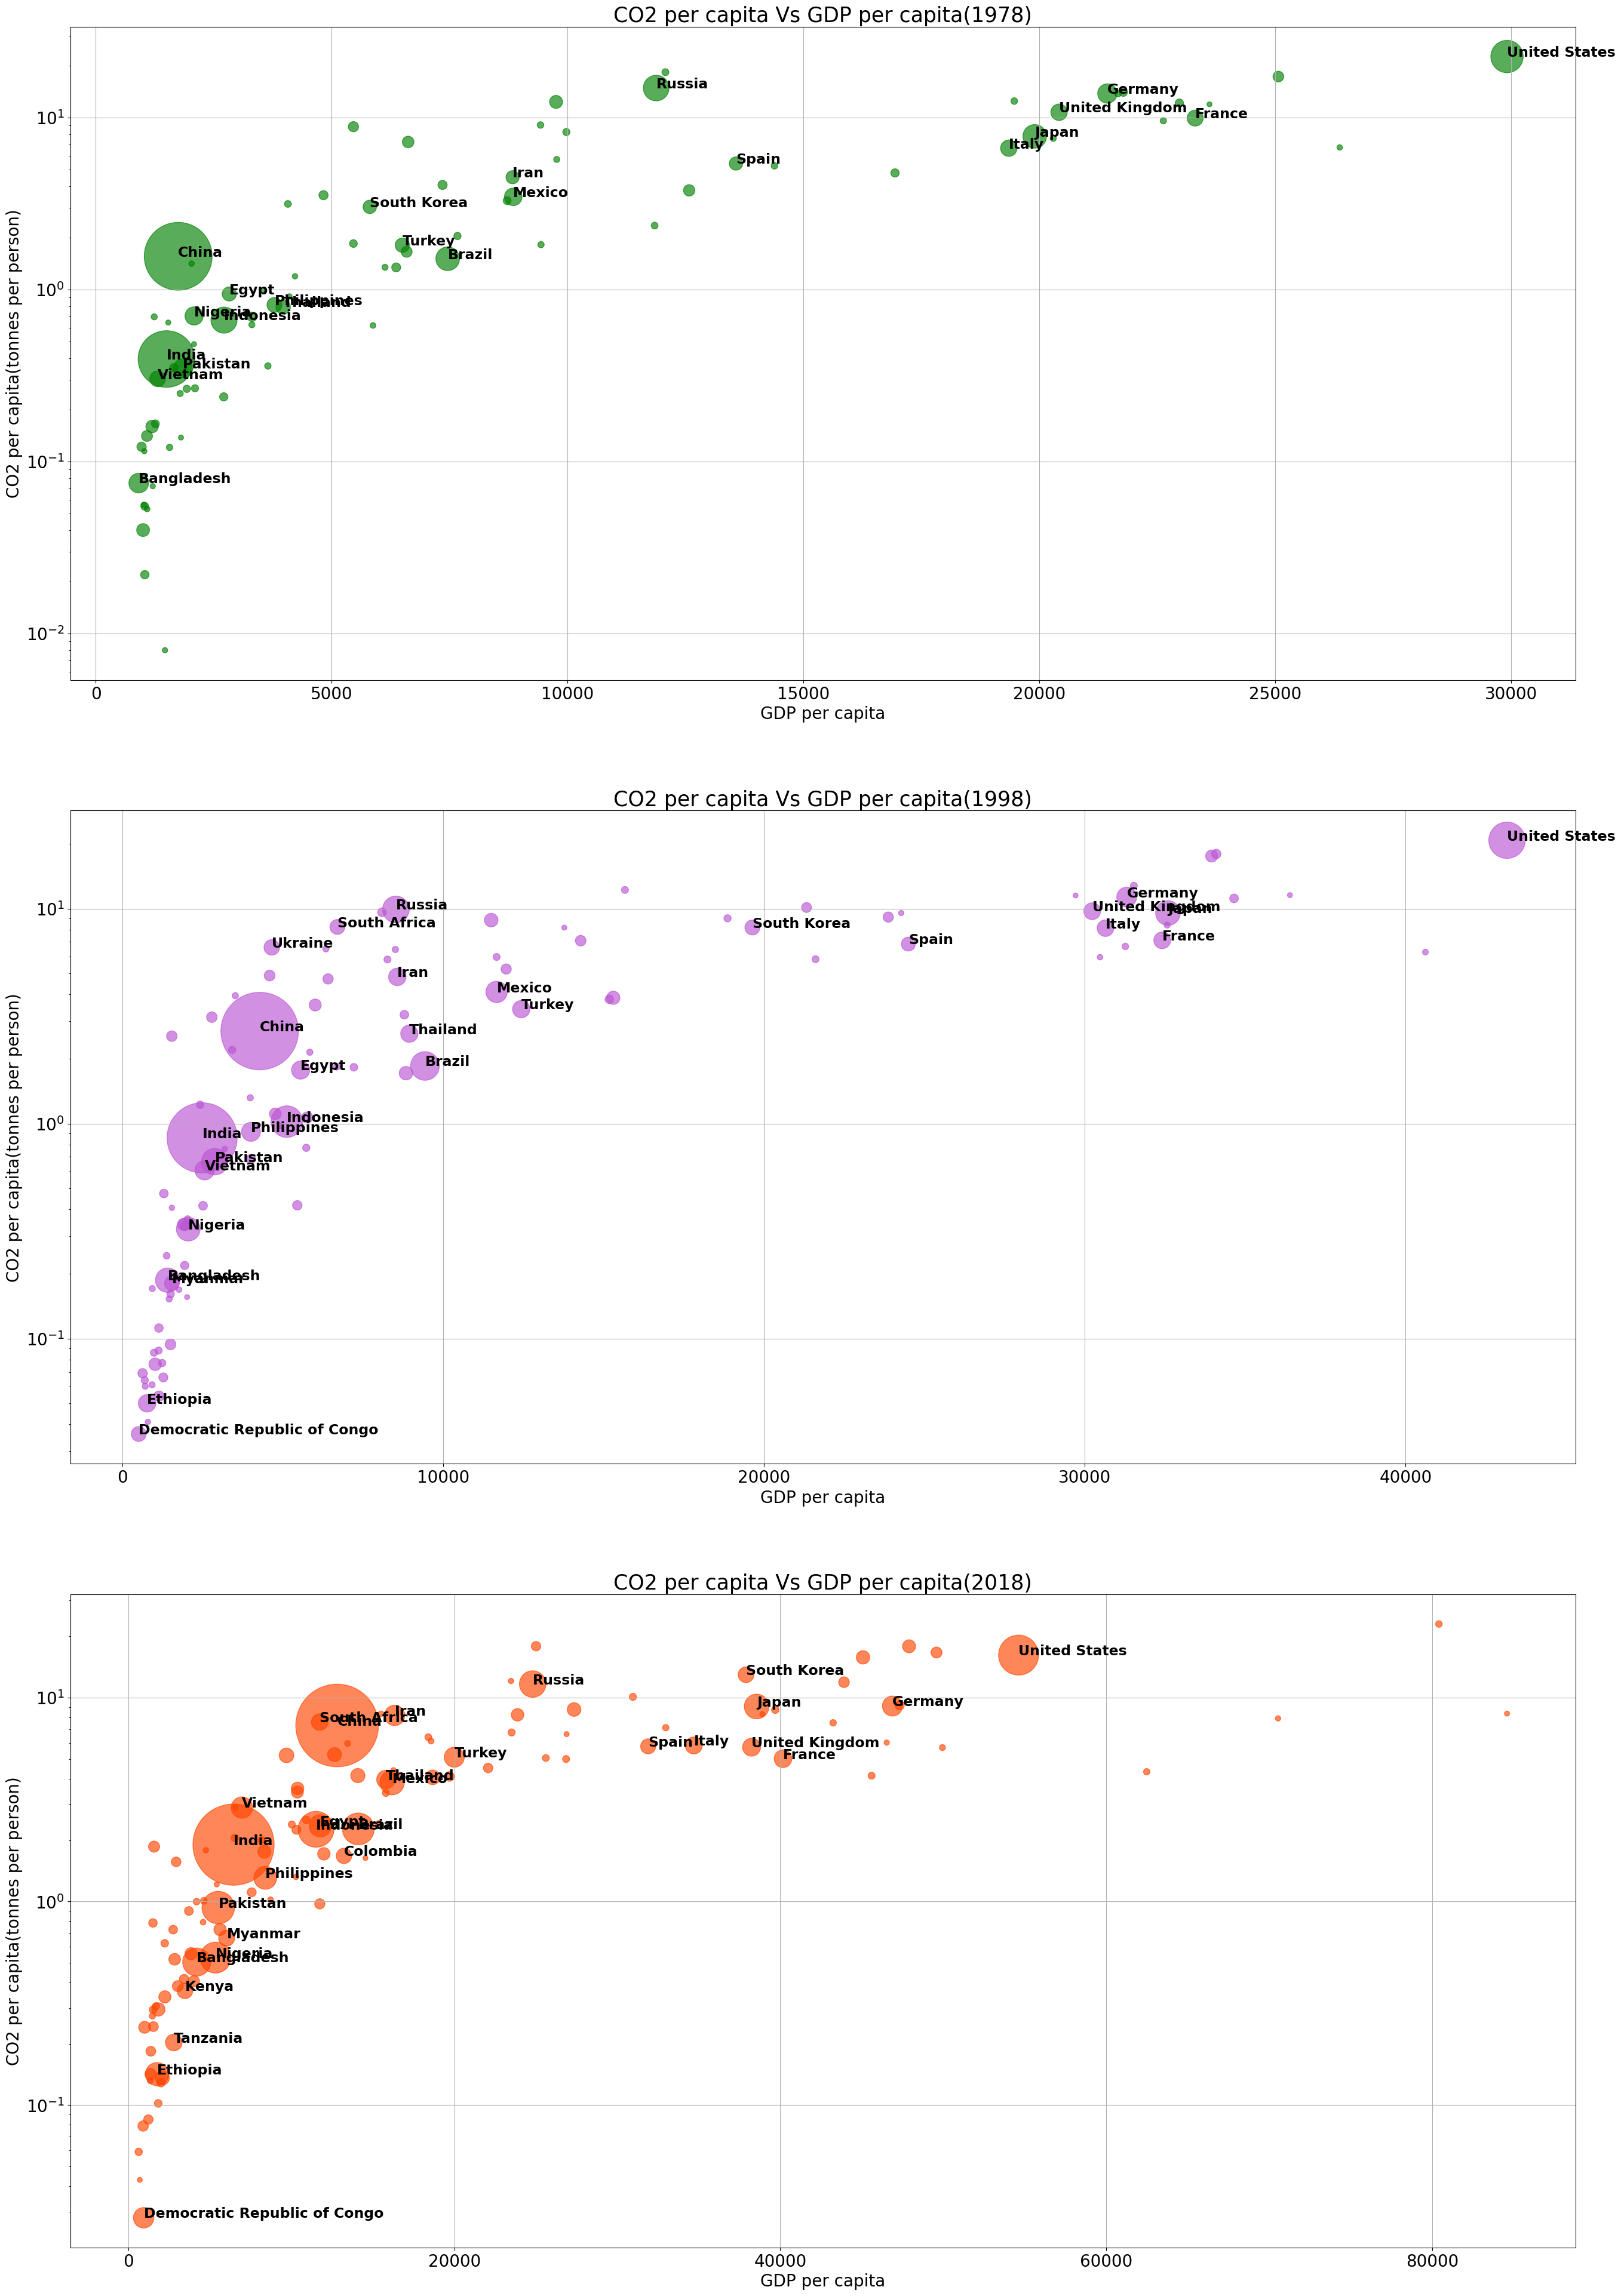

In [25]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.
df_1978 = df[df['year'] == 1978]
df_1978 = df_1978.dropna(subset=['iso_code'])#For filtering out the entries of World,continents and income groups in the dataframe
df_1978 = df_1978[df_1978['population'] >= 5000000]
df_1978['gdp_per_capita'] = df_1978['gdp']/df_1978['population']
k = 7e-6 #proportionality constant k for marker size
plt.figure(figsize=[12,12])

#1978
plt.subplot(3,1,1)
sc = plt.scatter(x = df_1978['gdp_per_capita'],y = df_1978['co2_per_capita'], c = 'green', s= df_1978['population']*k, alpha=0.65)
plt.title('CO2 per capita Vs GDP per capita(1978)',fontsize = 25)
plt.xlabel('GDP per capita',fontsize = 20)
plt.ylabel('CO2 per capita(tonnes per person)',fontsize = 20)
for i in range(len(df_1978)):
    if df_1978.iloc[i]['population'] >= 35e6 :
        plt.annotate(df_1978.iloc[i]['country'],(df_1978.iloc[i]['gdp_per_capita'],df_1978.iloc[i]['co2_per_capita']),fontsize = 17,fontweight="bold")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.yscale('log')
plt.grid()


#1998
plt.subplot(3,1,2)
df_1998 = df[df['year'] == 1998]
df_1998 = df_1998.dropna(subset=['iso_code'])
df_1998 = df_1998[df_1998['population'] >= 5000000]
df_1998['gdp_per_capita'] = df_1998['gdp']/df_1998['population']

sc = plt.scatter(x = df_1998['gdp_per_capita'],y = df_1998['co2_per_capita'], c = 'mediumorchid', s= df_1998['population']*k, alpha=0.65)
plt.title('CO2 per capita Vs GDP per capita(1998)',fontsize = 25)
plt.xlabel('GDP per capita',fontsize = 20)
plt.ylabel('CO2 per capita(tonnes per person)',fontsize = 20)
for i in range(len(df_1998)):
    if df_1998.iloc[i]['population'] >= 40e6:
        plt.annotate(df_1998.iloc[i]['country'],(df_1998.iloc[i]['gdp_per_capita'],df_1998.iloc[i]['co2_per_capita']),fontsize = 17,fontweight="bold")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.yscale('log')
plt.grid()

#2018
plt.subplot(3,1,3)
df_2018 = df[df['year'] == 2018]
df_2018 = df_2018.dropna(subset=['iso_code'])
df_2018 = df_2018[df_2018['population'] >= 5000000]
df_2018['gdp_per_capita'] = df_2018['gdp']/df_2018['population']

sc = plt.scatter(x = df_2018['gdp_per_capita'],y = df_2018['co2_per_capita'], c = 'orangered', s= df_2018['population']*k, alpha=0.65)
plt.title('CO2 per capita Vs GDP per capita(2018)',fontsize = 25)
plt.xlabel('GDP per capita',fontsize = 20)
plt.ylabel('CO2 per capita(tonnes per person)',fontsize = 20)
for i in range(len(df_2018)):
    if df_2018.iloc[i]['population'] >= 45e6:
        plt.annotate(df_2018.iloc[i]['country'],(df_2018.iloc[i]['gdp_per_capita'],df_2018.iloc[i]['co2_per_capita']),fontsize = 17,fontweight="bold")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.yscale('log')
plt.grid()
plt.subplots_adjust(left=1, bottom=0.001, right=3.1, top=3.1)
plt.show()



## Q4. The development of wealth inequality over time.

*Has the distribution of wealth across countries become more or less equal over time?*

Make a plot that compares the distribution of GDP per capita across the countries in the world and 10-yearly intervals from 1950 to 2020.  Comment on how the distribution has changed over time.

(Add your solution below. Add further markdown and code cells as needed.)

C:\UoS_DA_Lab\Anaconda\envs\com6018\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\UoS_DA_Lab\Anaconda\envs\com6018\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\UoS_DA_Lab\Anaconda\envs\com6018\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


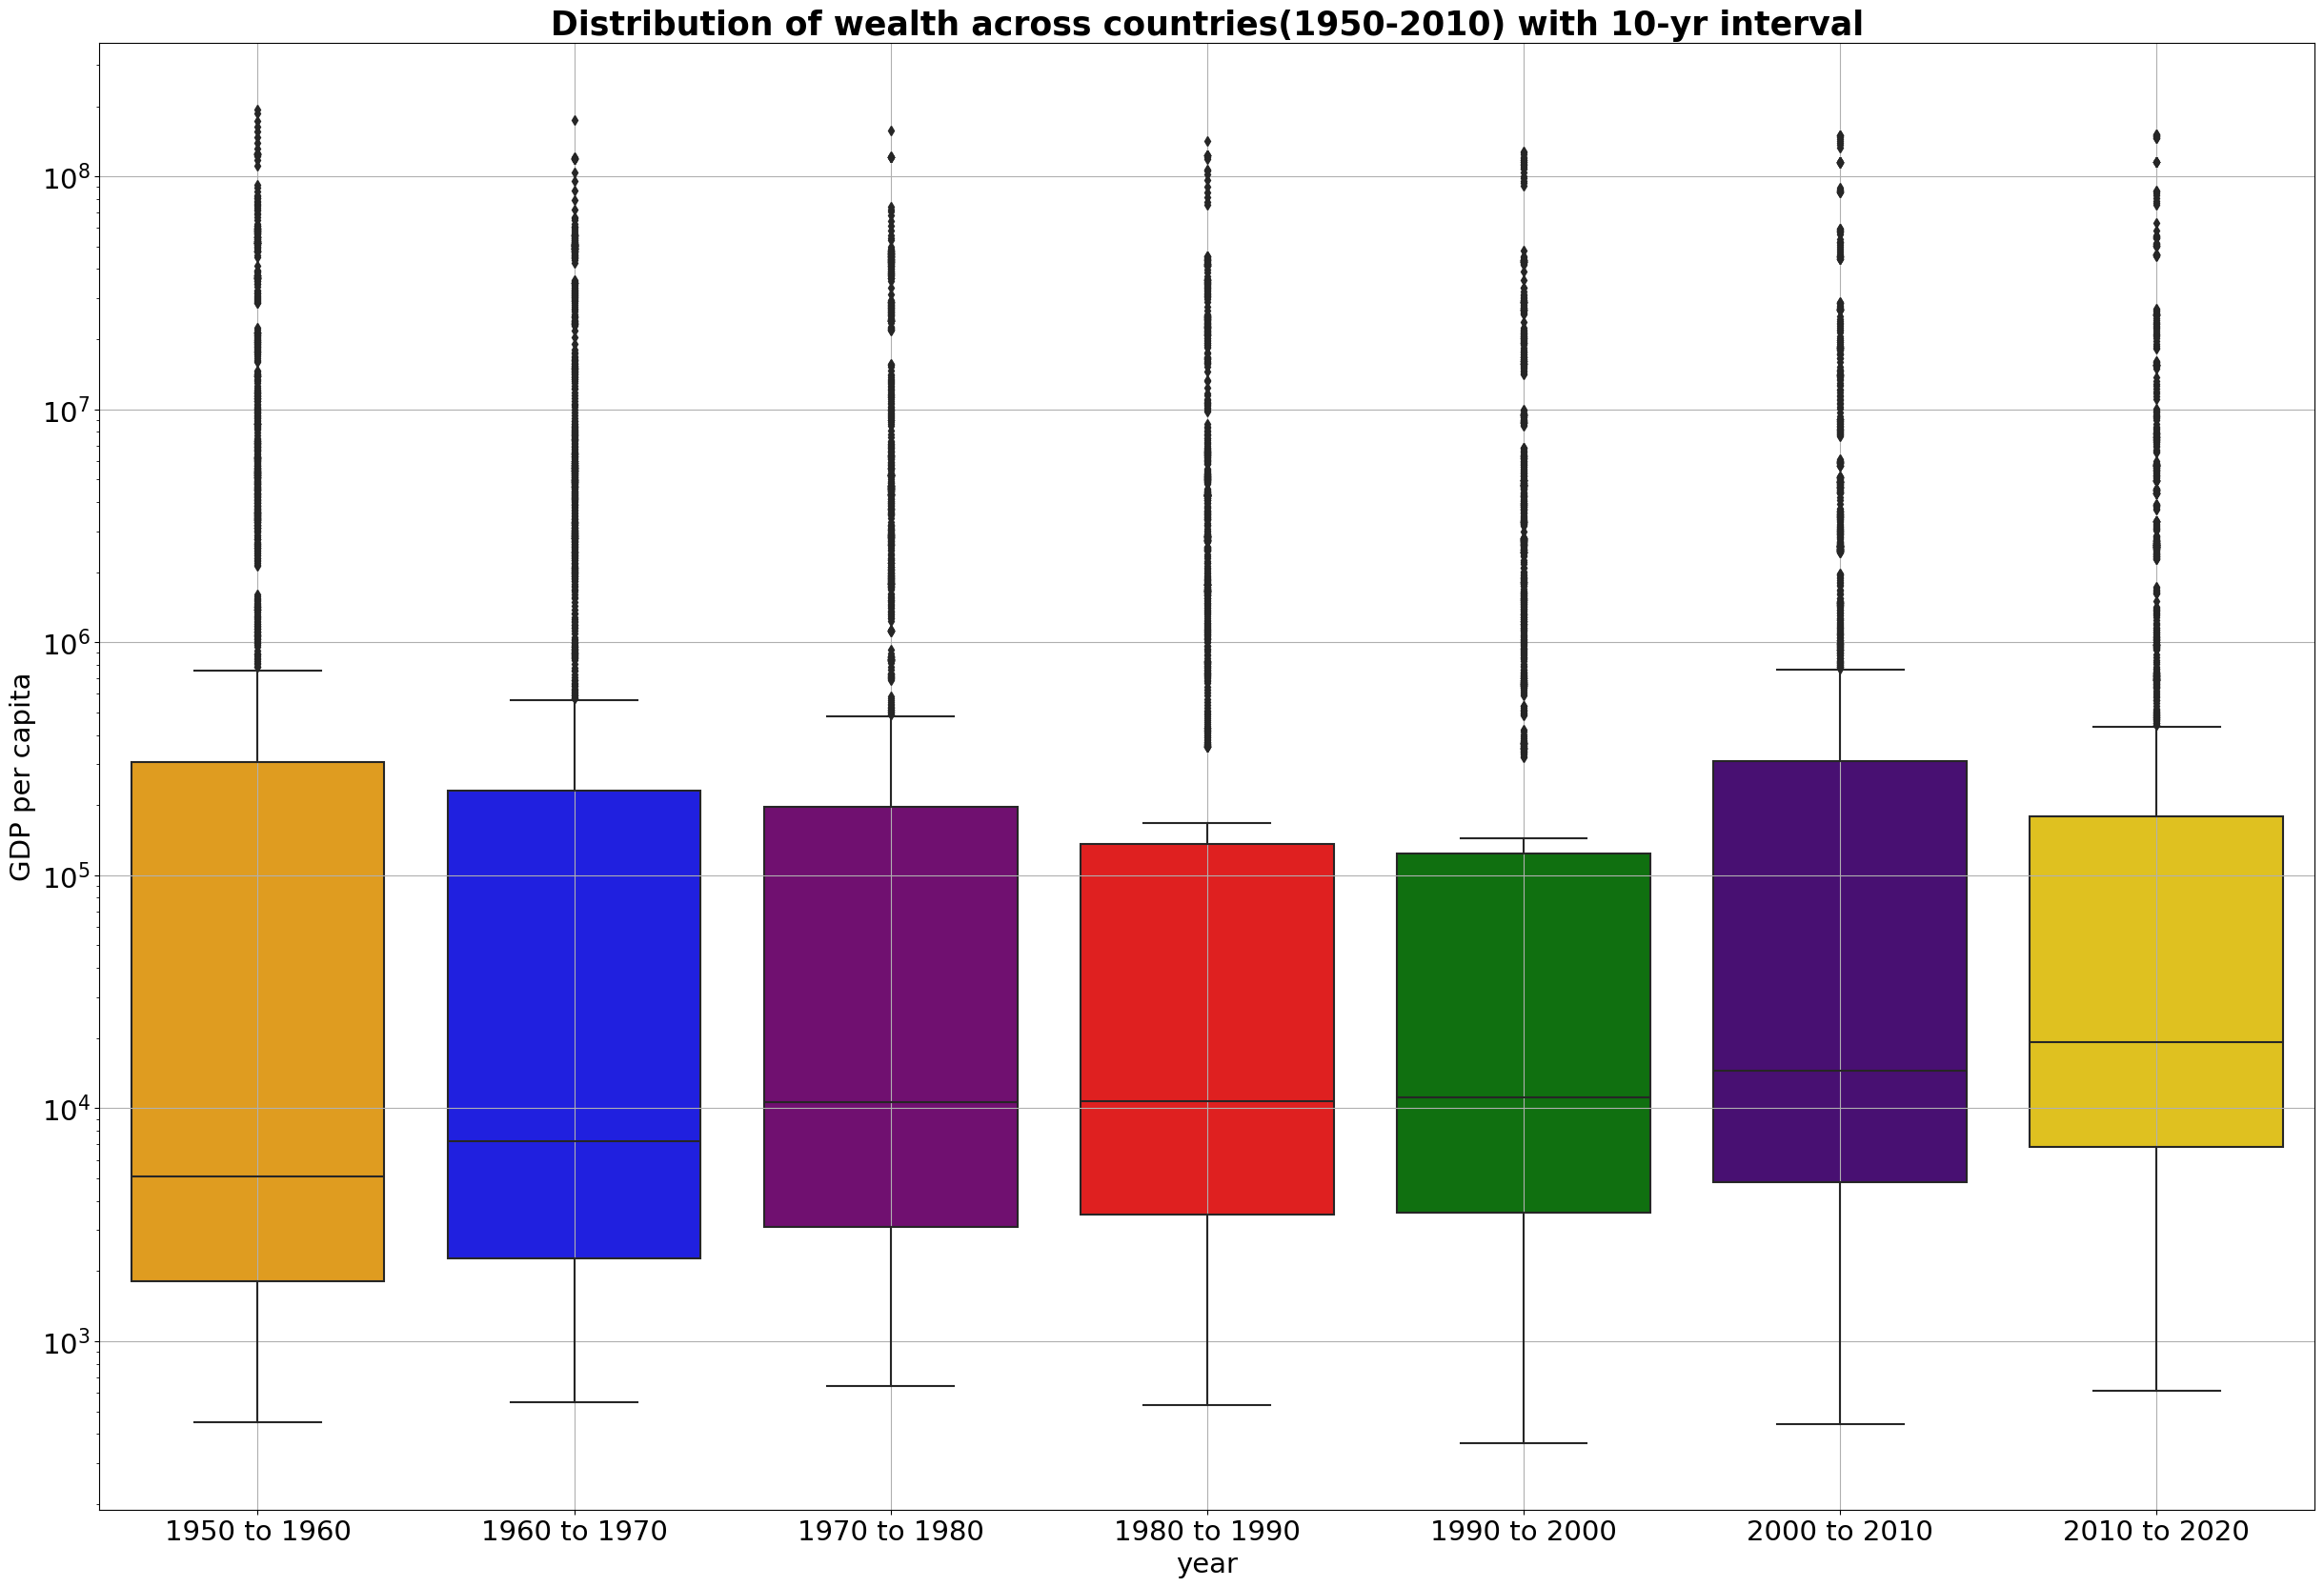

In [34]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.
country_df = df.copy()
country_df = country_df.dropna(subset=['iso_code'])
country_df = country_df[(country_df['year']>=1950)&(country_df['year']<=2018)]
country_df['gdp'].fillna(country_df['gdp'].mean(),inplace=True) #filling up missing values for visualizing data clearly
country_df['population'].fillna(country_df['population'].mean(),inplace=True)
country_df['gdp_per_capita'] = country_df['gdp']/country_df['population']
country_df['yr_int'] = (country_df['year'] //10)*10
country_df['yr_int'] = country_df['yr_int'].astype('str') + ' to ' + (country_df['yr_int'] + 10).astype('str')
plt.figure(figsize = [30,20])
color = ['orange', 'blue', 'purple', 'red', 'green','indigo','gold']
sns.boxplot(data = country_df,x = 'yr_int',y = 'gdp_per_capita',palette = color)
plt.yscale('log')
plt.grid()
plt.xlabel('year',fontsize=21)
plt.ylabel('GDP per capita',fontsize=21)
plt.title('Distribution of wealth across countries(1950-2010) with 10-yr interval',fontsize=25,fontweight='bold')
plt.xticks(fontsize=21)
plt.yticks(fontsize = 21)
plt.show()





## Reminder

Before submitting your notebook make sure that it runs correctly from the beginning by selecting "Restart and run all" from the Kernel menu. Make sure that you save your notebook using the name `COM6018-assignment1-<your-student-username>.ipynb`. For example, if your username is 'ac1jpb' then your notebook should be named `COM6018-assignment1-ac1jpb.ipynb`. To submit, follow the instruction in the accompanying assignment instructions document. For late submission, unless there are extenuating circumstances, standard lateness penalties will be applied.